#                                 TASK I (Unimodal: Image-Only)

### Import important libraries

In [25]:
import cv2
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Activation, Dropout
from sklearn.metrics import classification_report, confusion_matrix

### Load the training, testing and valdiation JSONLs

In [3]:
train_li = []
# Open the JSONL file
with open('./train.jsonl', 'r') as f:
    # Read each line of the file as a separate JSON object
    for line in f:
        train_li.append(json.loads(line))
        
test_li = []
# Open the JSONL file
with open('./test_seen.jsonl', 'r') as f:
    # Read eactest_seen.jsonlh line of the file as a separate JSON object
    for line in f:
        test_li.append(json.loads(line))
        
dev_li = []
# Open the JSONL file
with open('./dev_seen.jsonl', 'r') as f:
    # Read eactest_seen.jsonlh line of the file as a separate JSON object
    for line in f:
        dev_li.append(json.loads(line))

In [4]:
## Subsetting data if needed
train_li = train_li
test_li = test_li
dev_li = dev_li

In [5]:
## Getting dataframes
train_df = pd.DataFrame(train_li)
test_df = pd.DataFrame(test_li)
dev_df = pd.DataFrame(dev_li)

## 1. Preprocessing

Pre-process the images using atleast 2 techniques of your choice as converting into appropriate
format, normalization, gray-scaling etc. Make sure that your images are in the appropriate
format for your chosen model.

In [6]:
import cv2
import numpy as np

def preprocess_image(image_path):
    # Load image using cv2
    image = cv2.imread(image_path)
    
    # Resize image to 224x224
    image = cv2.resize(image, (224, 224))
    
    # Convert image to grayscale
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Normalize pixel values to [0, 1] range
    image = image.astype(np.float32) / 255.0
    
    # Add channel dimension to image
    image = np.expand_dims(image, axis=-1)
    
    return image


In [7]:
def show_image(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.show()
    plt.clf()

In [8]:
train_preprocessed = np.array([preprocess_image(img) for img in train_df['img'].values])
dev_preprocessed = np.array([preprocess_image(img) for img in dev_df['img'].values])
test_preprocessed = np.array([preprocess_image(img) for img in test_df['img'].values])

In [9]:
y_train = train_df['label'].values #[:1000] #.astype('float32').reshape((-1,1))
y_dev = dev_df['label'].values #[:100] #.astype('float32').reshape((-1,1))
y_test = test_df['label'].values #[:200] #.astype('float32').reshape((-1,1))

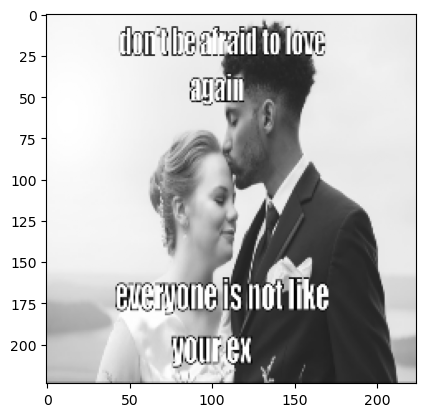

<Figure size 640x480 with 0 Axes>

In [10]:
show_image(train_preprocessed[1])

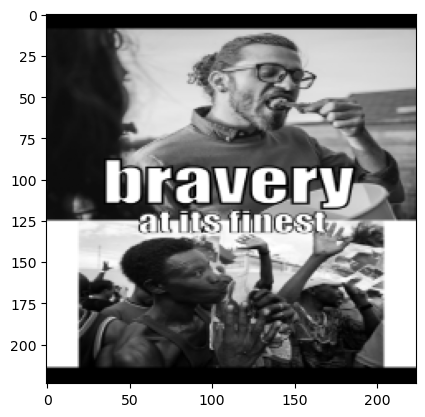

<Figure size 640x480 with 0 Axes>

In [11]:
show_image(dev_preprocessed[1])

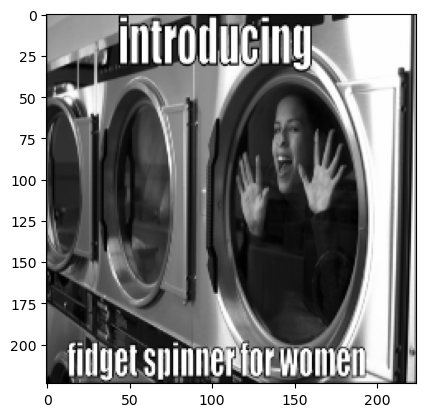

<Figure size 640x480 with 0 Axes>

In [12]:
show_image(test_preprocessed[1])

## 2. Implementing image-only models

Propose and implement an image-only model for classification using any deep learning image
classification model of your choice such as VGG, Vision Transformer Image-only, ResNet, etc or
you can build your own CNN model. The model selected should learn meaningful features from
images and be effective for image-only classification tasks.

### 2.1 Implementing a simple CNN Model

In [16]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [13]:
def return_cnn_model():

    model = Sequential()

    model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy', 'Precision', 'Recall', f1_m])

    return model

In [14]:
def return_cnn_model_2():
    
    model = Sequential()
    model.add(Conv2D(64, (5, 5), input_shape=(224, 224, 1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (5, 5)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy', 'Precision', 'Recall', f1_m])
    
    return model

In [44]:
def return_cnn_model_3():
    
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy', 'Precision', 'Recall', f1_m])
    return model

In [17]:
# Train the model with 50 epochs
cnn_model = return_cnn_model()

history_cnn_model = cnn_model.fit(np.array(train_preprocessed), np.array(y_train), epochs=50, \
                      validation_data=(np.array(dev_preprocessed), np.array(y_dev)))

Epoch 1/50


2023-04-20 16:19:20.178641: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-04-20 16:19:25.127967: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-04-20 16:19:25.460617: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


266/266 [==============================] - 14s 13ms/step - loss: 0.6762 - accuracy: 0.6412 - precision: 0.4335 - recall: 0.0335 - f1_m: 0.0410 - val_loss: 0.7324 - val_accuracy: 0.5080 - val_precision: 0.6000 - val_recall: 0.0121 - val_f1_m: 0.0254
Epoch 2/50
266/266 [==============================] - 3s 11ms/step - loss: 0.6120 - accuracy: 0.6649 - precision: 0.6007 - recall: 0.1689 - f1_m: 0.2440 - val_loss: 0.7620 - val_accuracy: 0.4980 - val_precision: 0.3571 - val_recall: 0.0202 - val_f1_m: 0.0383
Epoch 3/50
266/266 [==============================] - 3s 11ms/step - loss: 0.5230 - accuracy: 0.7340 - precision: 0.6986 - recall: 0.4415 - f1_m: 0.5196 - val_loss: 0.8651 - val_accuracy: 0.5060 - val_precision: 0.5000 - val_recall: 0.1822 - val_f1_m: 0.2486
Epoch 4/50
266/266 [==============================] - 3s 11ms/step - loss: 0.3761 - accuracy: 0.8275 - precision: 0.7965 - recall: 0.6910 - f1_m: 0.7282 - val_loss: 1.1024 - val_accuracy: 0.5000 - val_precision: 0.4776 - val_recall: 

In [26]:
cnn_model_2 = return_cnn_model_2()

history_cnn_model_2 = cnn_model_2.fit(np.array(train_preprocessed), np.array(y_train), epochs=50, \
                      validation_data=(np.array(dev_preprocessed), np.array(y_dev)))

Epoch 1/50


2023-04-20 16:24:27.790399: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_5/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


266/266 [==============================] - 19s 63ms/step - loss: 9.9741 - accuracy: 0.6249 - precision: 0.3798 - recall: 0.0884 - f1_m: 0.0775 - val_loss: 0.7513 - val_accuracy: 0.5060 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 2/50
266/266 [==============================] - 16s 59ms/step - loss: 0.6569 - accuracy: 0.6444 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 0.7238 - val_accuracy: 0.5060 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 3/50
266/266 [==============================] - 16s 60ms/step - loss: 0.6588 - accuracy: 0.6448 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_m: 0.0000e+00 - val_loss: 0.6999 - val_accuracy: 0.5060 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 4/50
266/266 [==============================] - 16s 59ms/step - loss: 0.6587 - accuracy: 0.6448 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_m: 0.0000e+00 - val

In [45]:
cnn_model_3 = return_cnn_model_3()

history_cnn_model_3 = cnn_model_3.fit(np.array(train_preprocessed), np.array(y_train), epochs=50, \
                      validation_data=(np.array(dev_preprocessed), np.array(y_dev)))

/home/prashant21227/anaconda3/envs/prash/lib/python3.9/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/50
266/266 [==============================] - 5s 17ms/step - loss: 0.6699 - accuracy: 0.6414 - precision: 0.3972 - recall: 0.0185 - f1_m: 0.0123 - val_loss: 0.8100 - val_accuracy: 0.5060 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_m: 0.0000e+00
Epoch 2/50
266/266 [==============================] - 4s 15ms/step - loss: 0.6489 - accuracy: 0.6433 - precision: 0.4343 - recall: 0.0142 - f1_m: 0.0202 - val_loss: 0.7339 - val_accuracy: 0.5040 - val_precision: 0.3333 - val_recall: 0.0040 - val_f1_m: 0.0078
Epoch 3/50
266/266 [==============================] - 4s 15ms/step - loss: 0.6330 - accuracy: 0.6469 - precision: 0.5381 - recall: 0.0421 - f1_m: 0.0686 - val_loss: 0.7668 - val_accuracy: 0.5120 - val_precision: 1.0000 - val_recall: 0.0121 - val_f1_m: 0.0160
Epoch 4/50
266/266 [==============================] - 4s 15ms/step - loss: 0.6173 - accuracy: 0.6605 - precision: 0.6044 - recall: 0.1275 - f1_m: 0.1921 - val_loss: 0.7524 - val_accuracy: 0.5040 - val_precision:

In [33]:
def plot_history(history = history_cnn_model):
    
    # Plot the training and validation loss
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Plot the training and validation accuracy
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [51]:
def get_metrics(model = cnn_model):
    
    test_loss, test_acc, test_precision, test_recall, test_f1 = model.evaluate(test_preprocessed, y_test)
    train_loss, train_acc, train_precision, train_recall, train_f1 = model.evaluate(train_preprocessed, y_train)
    dev_loss, dev_acc, dev_precision, dev_recall, dev_f1 = model.evaluate(dev_preprocessed, y_dev)
    
    
    print("#######################################################################################################")
    print("#######################################################################################################")
    
    print("Following are the TEST metrics associated with the model\n")    
    print(f'Test loss: {test_loss}\n')
    print(f'Test acuuracy: {test_acc}\n')
    print(f'Test precision: {test_precision}\n')
    print(f'Test recall: {test_recall}\n')
    print(f'Test F1-Score: {test_f1}\n')
    y_pred = model.predict(test_preprocessed)
    print(classification_report(y_test.reshape(-1,1), y_pred.round()))
    
    print("#######################################################################################################")
    print("#######################################################################################################")
    print("Following are the TRAIN metrics associated with the model\n")    
    print(f'Train loss: {train_loss}\n')
    print(f'Train acuuracy: {train_acc}\n')
    print(f'Train precision: {train_precision}\n')
    print(f'Train recall: {train_recall}\n')
    print(f'Train F1-Score: {train_f1}\n')
    y_pred_train = model.predict(train_preprocessed)
    print(classification_report(y_train.reshape(-1,1), y_pred_train.round()))
    
    print("#######################################################################################################")
    print("#######################################################################################################")
    print("Following are the DEV metrics associated with the model\n")    
    print(f'Train loss: {dev_loss}\n')
    print(f'Train acuuracy: {dev_acc}\n')
    print(f'Train precision: {dev_precision}\n')
    print(f'Train recall: {dev_recall}\n')
    print(f'Train F1-Score: {dev_f1}\n')
    y_pred_dev = model.predict(dev_preprocessed)
    print(classification_report(y_dev.reshape(-1,1), y_pred_dev.round()))
    

##### CNN-Model-1

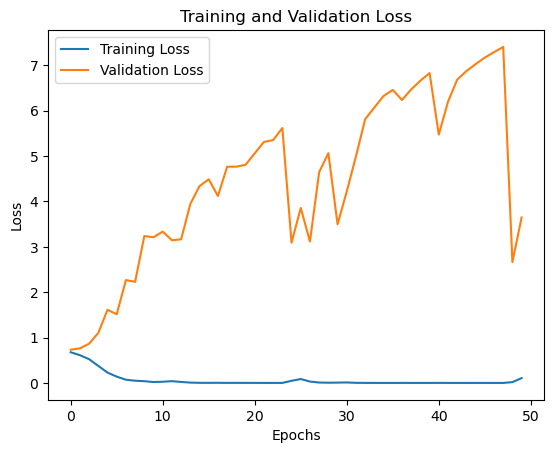

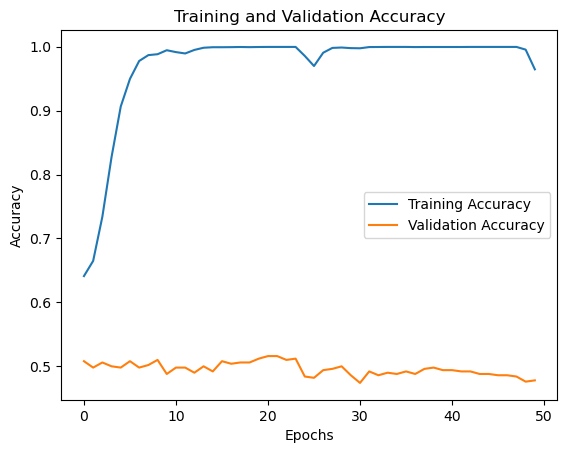

In [35]:
plot_history(history_cnn_model)

In [52]:
get_metrics(cnn_model)

16/16 [==============================] - 0s 5ms/step - loss: 3.6456 - accuracy: 0.4780 - precision: 0.4485 - recall: 0.2470 - f1_m: 0.3076
#######################################################################################################
#######################################################################################################
Following are the TEST metrics associated with the model

Test loss: 3.4917807579040527

Test acuuracy: 0.4950000047683716

Test precision: 0.4740484356880188

Test recall: 0.279591828584671

Test F1-Score: 0.34587135910987854

32/32 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.50      0.70      0.59       510
           1       0.47      0.28      0.35       490

    accuracy                           0.49      1000
   macro avg       0.49      0.49      0.47      1000
weighted avg       0.49      0.49      0.47      1000

#############################################

##### CNN-Model-2

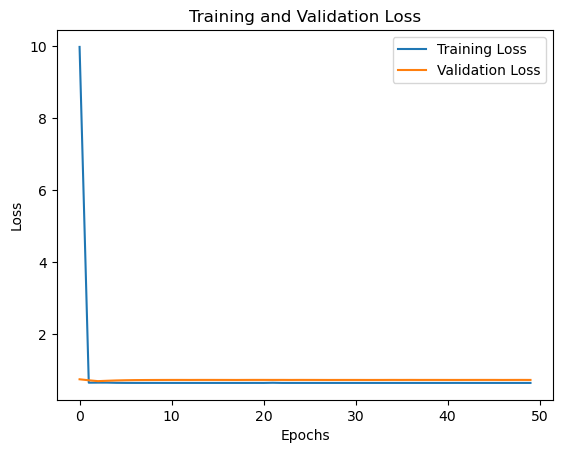

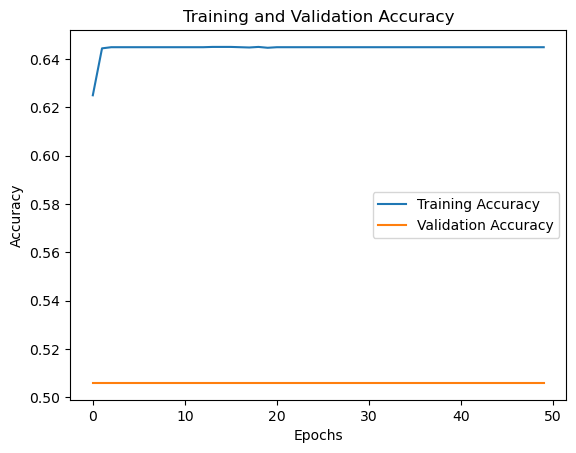

In [37]:
plot_history(history_cnn_model_2)

In [53]:
get_metrics(cnn_model_2)

16/16 [==============================] - 0s 11ms/step - loss: 0.7333 - accuracy: 0.5060 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_m: 0.0000e+00
#######################################################################################################
#######################################################################################################
Following are the TEST metrics associated with the model

Test loss: 0.7309284210205078

Test acuuracy: 0.5099999904632568

Test precision: 0.0

Test recall: 0.0

Test F1-Score: 0.0

32/32 [==============================] - 0s 10ms/step
              precision    recall  f1-score   support

           0       0.51      1.00      0.68       510
           1       0.00      0.00      0.00       490

    accuracy                           0.51      1000
   macro avg       0.26      0.50      0.34      1000
weighted avg       0.26      0.51      0.34      1000

############################################################################

/home/prashant21227/anaconda3/envs/prash/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/prashant21227/anaconda3/envs/prash/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/prashant21227/anaconda3/envs/prash/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

266/266 [==============================] - 3s 10ms/step
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      5481
           1       0.00      0.00      0.00      3019

    accuracy                           0.64      8500
   macro avg       0.32      0.50      0.39      8500
weighted avg       0.42      0.64      0.51      8500

#######################################################################################################
#######################################################################################################
Following are the DEV metrics associated with the model

Train loss: 0.7333117723464966

Train acuuracy: 0.5059999823570251

Train precision: 0.0

Train recall: 0.0

Train F1-Score: 0.0

13/16 [=======================>......] - ETA: 0s

/home/prashant21227/anaconda3/envs/prash/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/prashant21227/anaconda3/envs/prash/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/prashant21227/anaconda3/envs/prash/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

16/16 [==============================] - 0s 10ms/step
              precision    recall  f1-score   support

           0       0.51      1.00      0.67       253
           1       0.00      0.00      0.00       247

    accuracy                           0.51       500
   macro avg       0.25      0.50      0.34       500
weighted avg       0.26      0.51      0.34       500



/home/prashant21227/anaconda3/envs/prash/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/prashant21227/anaconda3/envs/prash/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/prashant21227/anaconda3/envs/prash/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

### CNN Model-3

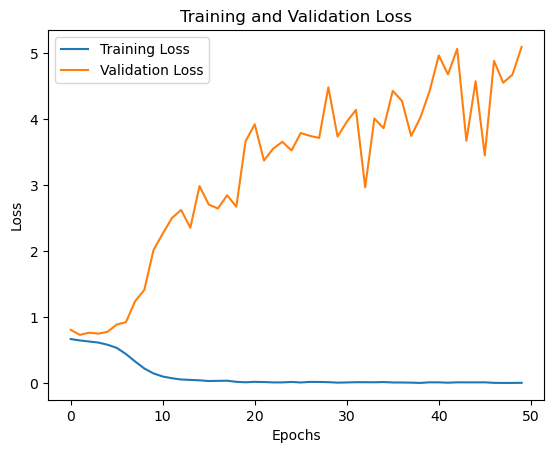

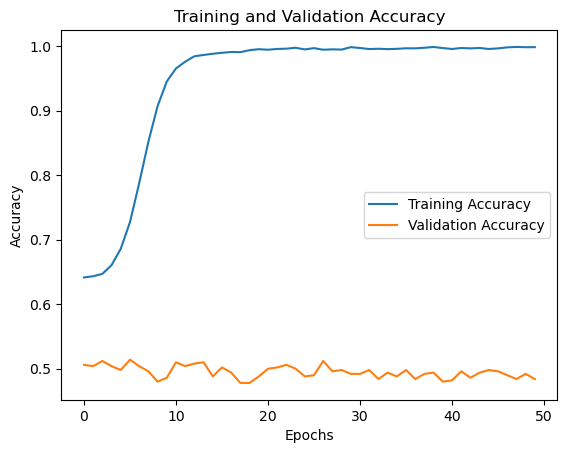

In [47]:
plot_history(history_cnn_model_3)

In [54]:
get_metrics(cnn_model_3)

16/16 [==============================] - 0s 6ms/step - loss: 5.0980 - accuracy: 0.4840 - precision: 0.4505 - recall: 0.2024 - f1_m: 0.2469
#######################################################################################################
#######################################################################################################
Following are the TEST metrics associated with the model

Test loss: 4.72576904296875

Test acuuracy: 0.5170000195503235

Test precision: 0.5140562057495117

Test recall: 0.2612244784832001

Test F1-Score: 0.3352556824684143

32/32 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.52      0.76      0.62       510
           1       0.51      0.26      0.35       490

    accuracy                           0.52      1000
   macro avg       0.52      0.51      0.48      1000
weighted avg       0.52      0.52      0.48      1000

###############################################